# Task 1 - Data Preparation
For this task, you will perform the following steps:
- Load all the necessary packages for this exercise
- Load the data
- Split the data into input features and the target variable
- Split the data into training and validation datasets

In [1]:
# Import 'numpy' and 'pandas' to work with numbers and dataframes
import pandas as pd
import numpy as np

# Import 'matplotlib.pyplot' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Import method for train-validation split
from sklearn.model_selection import train_test_split

# Import methods for building and visualizing decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Import 'GridSearchCV' for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Import suitable performance metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score, precision_recall_curve, f1_score

In [2]:
# Load the data and take a look at it
# Note: Make sure that the data is in the same folder as the Jupyter notebook or specify the address correctly
churndata = pd.read_csv('churndata_DT.csv', index_col = 'customerID')
churndata.head(2)

,TotalCharges,MonthlyCharges,tenure,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PhoneService_No,PhoneService_Yes,Churn
customerID,,,,,,,,,,,,,,,,,,,,,
4837-PZTIC,1875.25,41.90,47,0,0,1,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
6507-ZJSUR,2117.25,90.45,23,1,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,1,0


In [3]:
# Split the data into input features and the target variable
# Note: The target variable here is the 'Churn' feature
X = churndata.iloc[:, :-2]
y = churndata['Churn']

In [4]:
# Split the data into training and validation datasets using the 'train_test_split' method
# Hint: Study the documentation of the 'train_test_split' method
# Note: Use 'test_size = 0.3' and 'random_state = 0'
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

# Task 2 - Building Classification Models
For this task, you will perform the following steps:
- Build and analyze a basic decision tree model without any pruning
- Build and analyze a decision tree model pruned using the *ccp_alpha* parameter
- Build and analyze a decision tree model pruned using the *max_depth* parameter

## Sub-task 1 - Decision Tree Model 1
For this sub-task, you will perform the following steps:
- Build a basic decision tree model without pruning
- Visualize the confusion matrix for the training and validation sets
- Compute various classification performance measures for the model

In [9]:
# Train a decision tree without any pruning on the training data using the 'DecisionTreeClassifier()' method
# Hint: Study the documentation of the 'DecisionTreeClassifier()' method
# Note: Use 'random_state = 0'
tree_model_1 = DecisionTreeClassifier(random_state = 0)
tree_model_1 = tree_model_1.fit(X_train, y_train)

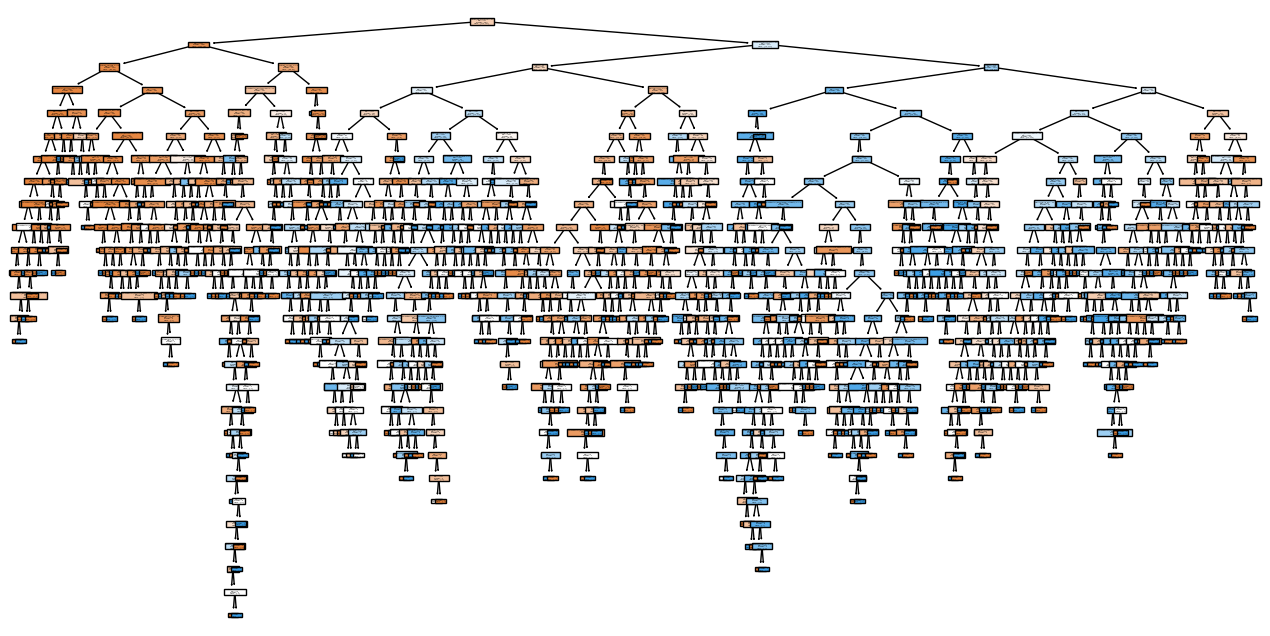

In [10]:
# Visualize the decision tree for 'tree_model_1'
# Note: This cell may take a while to run owing to the large number of nodes to be displayed, so please be patient
# Note: If you face consistent issues with running this cell, please feel free to comment it out and skip it
fig = plt.figure(figsize = (16, 8))
fig = tree.plot_tree(tree_model_1, feature_names = X.columns, filled = True)

In [11]:
# Print the number of leaves and the depth of the tree for 'tree_model_1' using the 'get_n_leaves()' and the 'get_depth()' methods
# Hint: Study the documentations of the 'get_n_leaves()' and the 'get_depth()' methods
tree_model_1_n_leaves = tree_model_1.get_n_leaves()
tree_model_1_depth = tree_model_1.get_depth()
print('Number of leaves =', tree_model_1_n_leaves)
print('Tree depth =', tree_model_1_depth)

Number of leaves = 837
Tree depth = 26


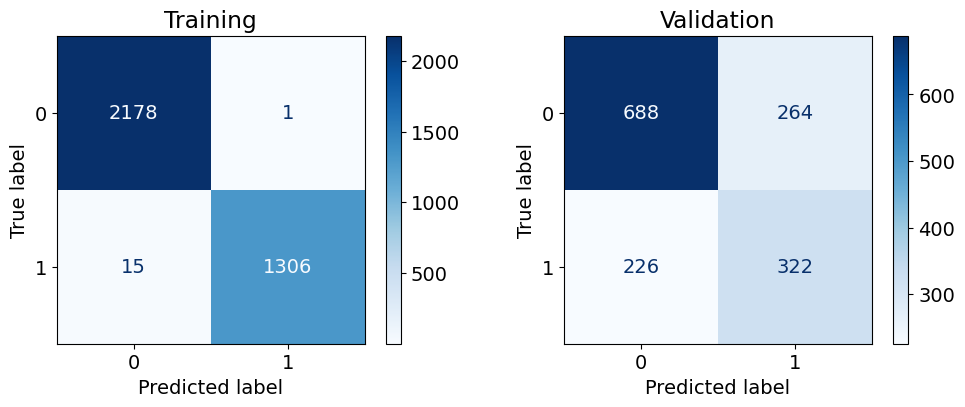

In [12]:
# Display the confusion matrices for 'tree_model_1' on the training and validation data
# Hint: Study the documentation of the 'ConfusionMatrixDisplay.from_estimator()' method
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ConfusionMatrixDisplay.from_estimator(tree_model_1, X_train, y_train, cmap = plt.cm.Blues, ax = ax[0])
ConfusionMatrixDisplay.from_estimator(tree_model_1, X_val, y_val, cmap = plt.cm.Blues, ax = ax[1])
ax[0].set_title('Training')
ax[1].set_title('Validation');

In [13]:
# Obtain predicted class labels for the training and validation data using 'tree_model_1' using the 'predict()' method
# Hint: Study the documentation of the 'predict()' method
y_pred_1_train = tree_model_1.predict(X_train)
y_pred_1_val = tree_model_1.predict(X_val)

In [15]:
# Compute the accuracy and the sensitivity of 'tree_model_1' on the training and validation data
# Hint: Study the documentations of the different peformance metrics methods
# Note: The 'pos_label' parameter for the 'recall_score()' method should be set to the positive class label
# Note: The positive class label in this exercise is '1', which is also the default value for the 'pos_label' parameter
acc_train_1 = accuracy_score(y_pred_1_train, y_train)
acc_val_1 = accuracy_score(y_pred_1_val, y_val)
sens_train_1 = recall_score(y_pred_1_train, y_train, pos_label=1)
sens_val_1 = recall_score(y_pred_1_val, y_val, pos_label=0)

# Summarize the above metrics for the train and validation sets using a single data frame and display it
tree_model_1_metrics = pd.DataFrame(data = {'Accuracy': [acc_train_1, acc_val_1],
                                            'Sensitivity': [sens_train_1, sens_val_1]},
                                    index = ['tree_model_1_train', 'tree_model_1_val'])

tree_model_1_metrics

,Accuracy,Sensitivity
tree_model_1_train,0.995429,0.999235
tree_model_1_val,0.673333,0.752735


## Sub-task 2 - Decision Tree Model 2
For this sub-task, you will perform the following steps:
- Build a pruned decision tree model using the *ccp_alpha* hyperparameter
- Visualize the confusion matrix for the training and validation sets
- Compute various classification performance measures for the model

In [18]:
# Obtain the cost complexity pruning path information from 'tree_model_1'
# Hint: Study the documentation of the 'cost_complexity_pruning_path()' method
path = tree_model_1.cost_complexity_pruning_path(X_train, y_train)

# Obtain the list of cost complexity alpha values from the path
ccp_alphas = path.ccp_alphas

# Create an empty list to store the tree models for each cost complexity alpha value
tree_models = []

# Fit a decision tree model for each value of cost complexity alpha
for ccp_alpha_value in ccp_alphas:

    # Fit a tree model on the training data with the current cost complexity value using the 'DecisionTreeClassifier()' method
    # Hint: The parameter 'ccp_alpha' needs to be set to the current cost complexity alpha value
    # Note: Use 'random_state = 0'
    curr_tree_model = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha_value)
    curr_tree_model = curr_tree_model.fit(X_train, y_train)

    # Add the model to the list of models
    tree_models.append(curr_tree_model)

C:\Users\Vr3n\AppData\Local\Temp\ipykernel_7240\2245613996.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = ccp_alphas, y = train_acc, color = 'red', label = 'Training', ci = None)
C:\Users\Vr3n\AppData\Local\Temp\ipykernel_7240\2245613996.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = ccp_alphas, y = val_acc, color = 'blue', label = 'Validation', ci = None)


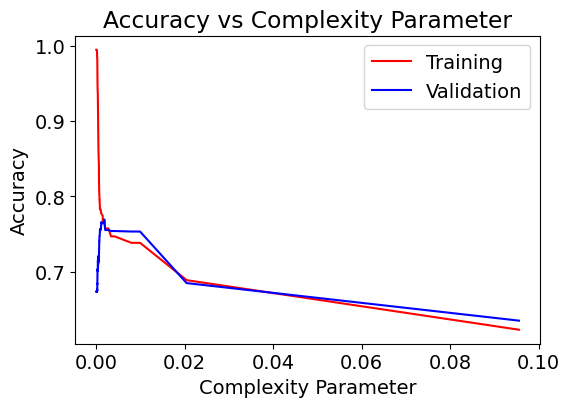

In [19]:
# Create an empty list to store the accuracy values for the trees in 'tree_models' for the training and validation datasets
train_acc = []
val_acc = []

# Obtain training and validation accuracies for each tree in 'tree_models'
for tree_model in tree_models:
    # Obtain predicted class labels for the training and validation data using the current tree in 'tree_models' using the 'predict()' method
    y_train_pred = tree_model.predict(X_train)
    y_val_pred = tree_model.predict(X_val)

    # Append the accuracy values for the training and validation datasets to the lists
    train_acc.append(accuracy_score(y_train_pred, y_train))
    val_acc.append(accuracy_score(y_val_pred, y_val))

# Plot a graph to show how the training and validation accuracies vary as the cost complexity parameter increases
plt.figure(figsize = (6, 4))
sns.lineplot(x = ccp_alphas, y = train_acc, color = 'red', label = 'Training', ci = None)
sns.lineplot(x = ccp_alphas, y = val_acc, color = 'blue', label = 'Validation', ci = None)
plt.xlabel('Complexity Parameter')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Complexity Parameter')
plt.legend()
plt.legend(bbox_to_anchor = [1, 1]);

In [20]:
# Print the value of 'ccp_alpha' for which the validation accuracy is the highest
best_ccp_alpha = ccp_alphas[val_acc.index(max(val_acc))]
print('Best CCP alpha: ', best_ccp_alpha)

Best CCP alpha:  0.0017977929808286955


In [21]:
# Train a decision tree on the training data using the 'DecisionTreeClassifier()' method with the best 'ccp_alpha' value
# Hint: The parameter 'ccp_alpha' needs to be set to 'best_ccp_alpha'
# Note: Use 'random_state = 0'
tree_model_2 = tree.DecisionTreeClassifier(random_state = 0, ccp_alpha = best_ccp_alpha)
tree_model_2 = tree_model_2.fit(X_train, y_train)

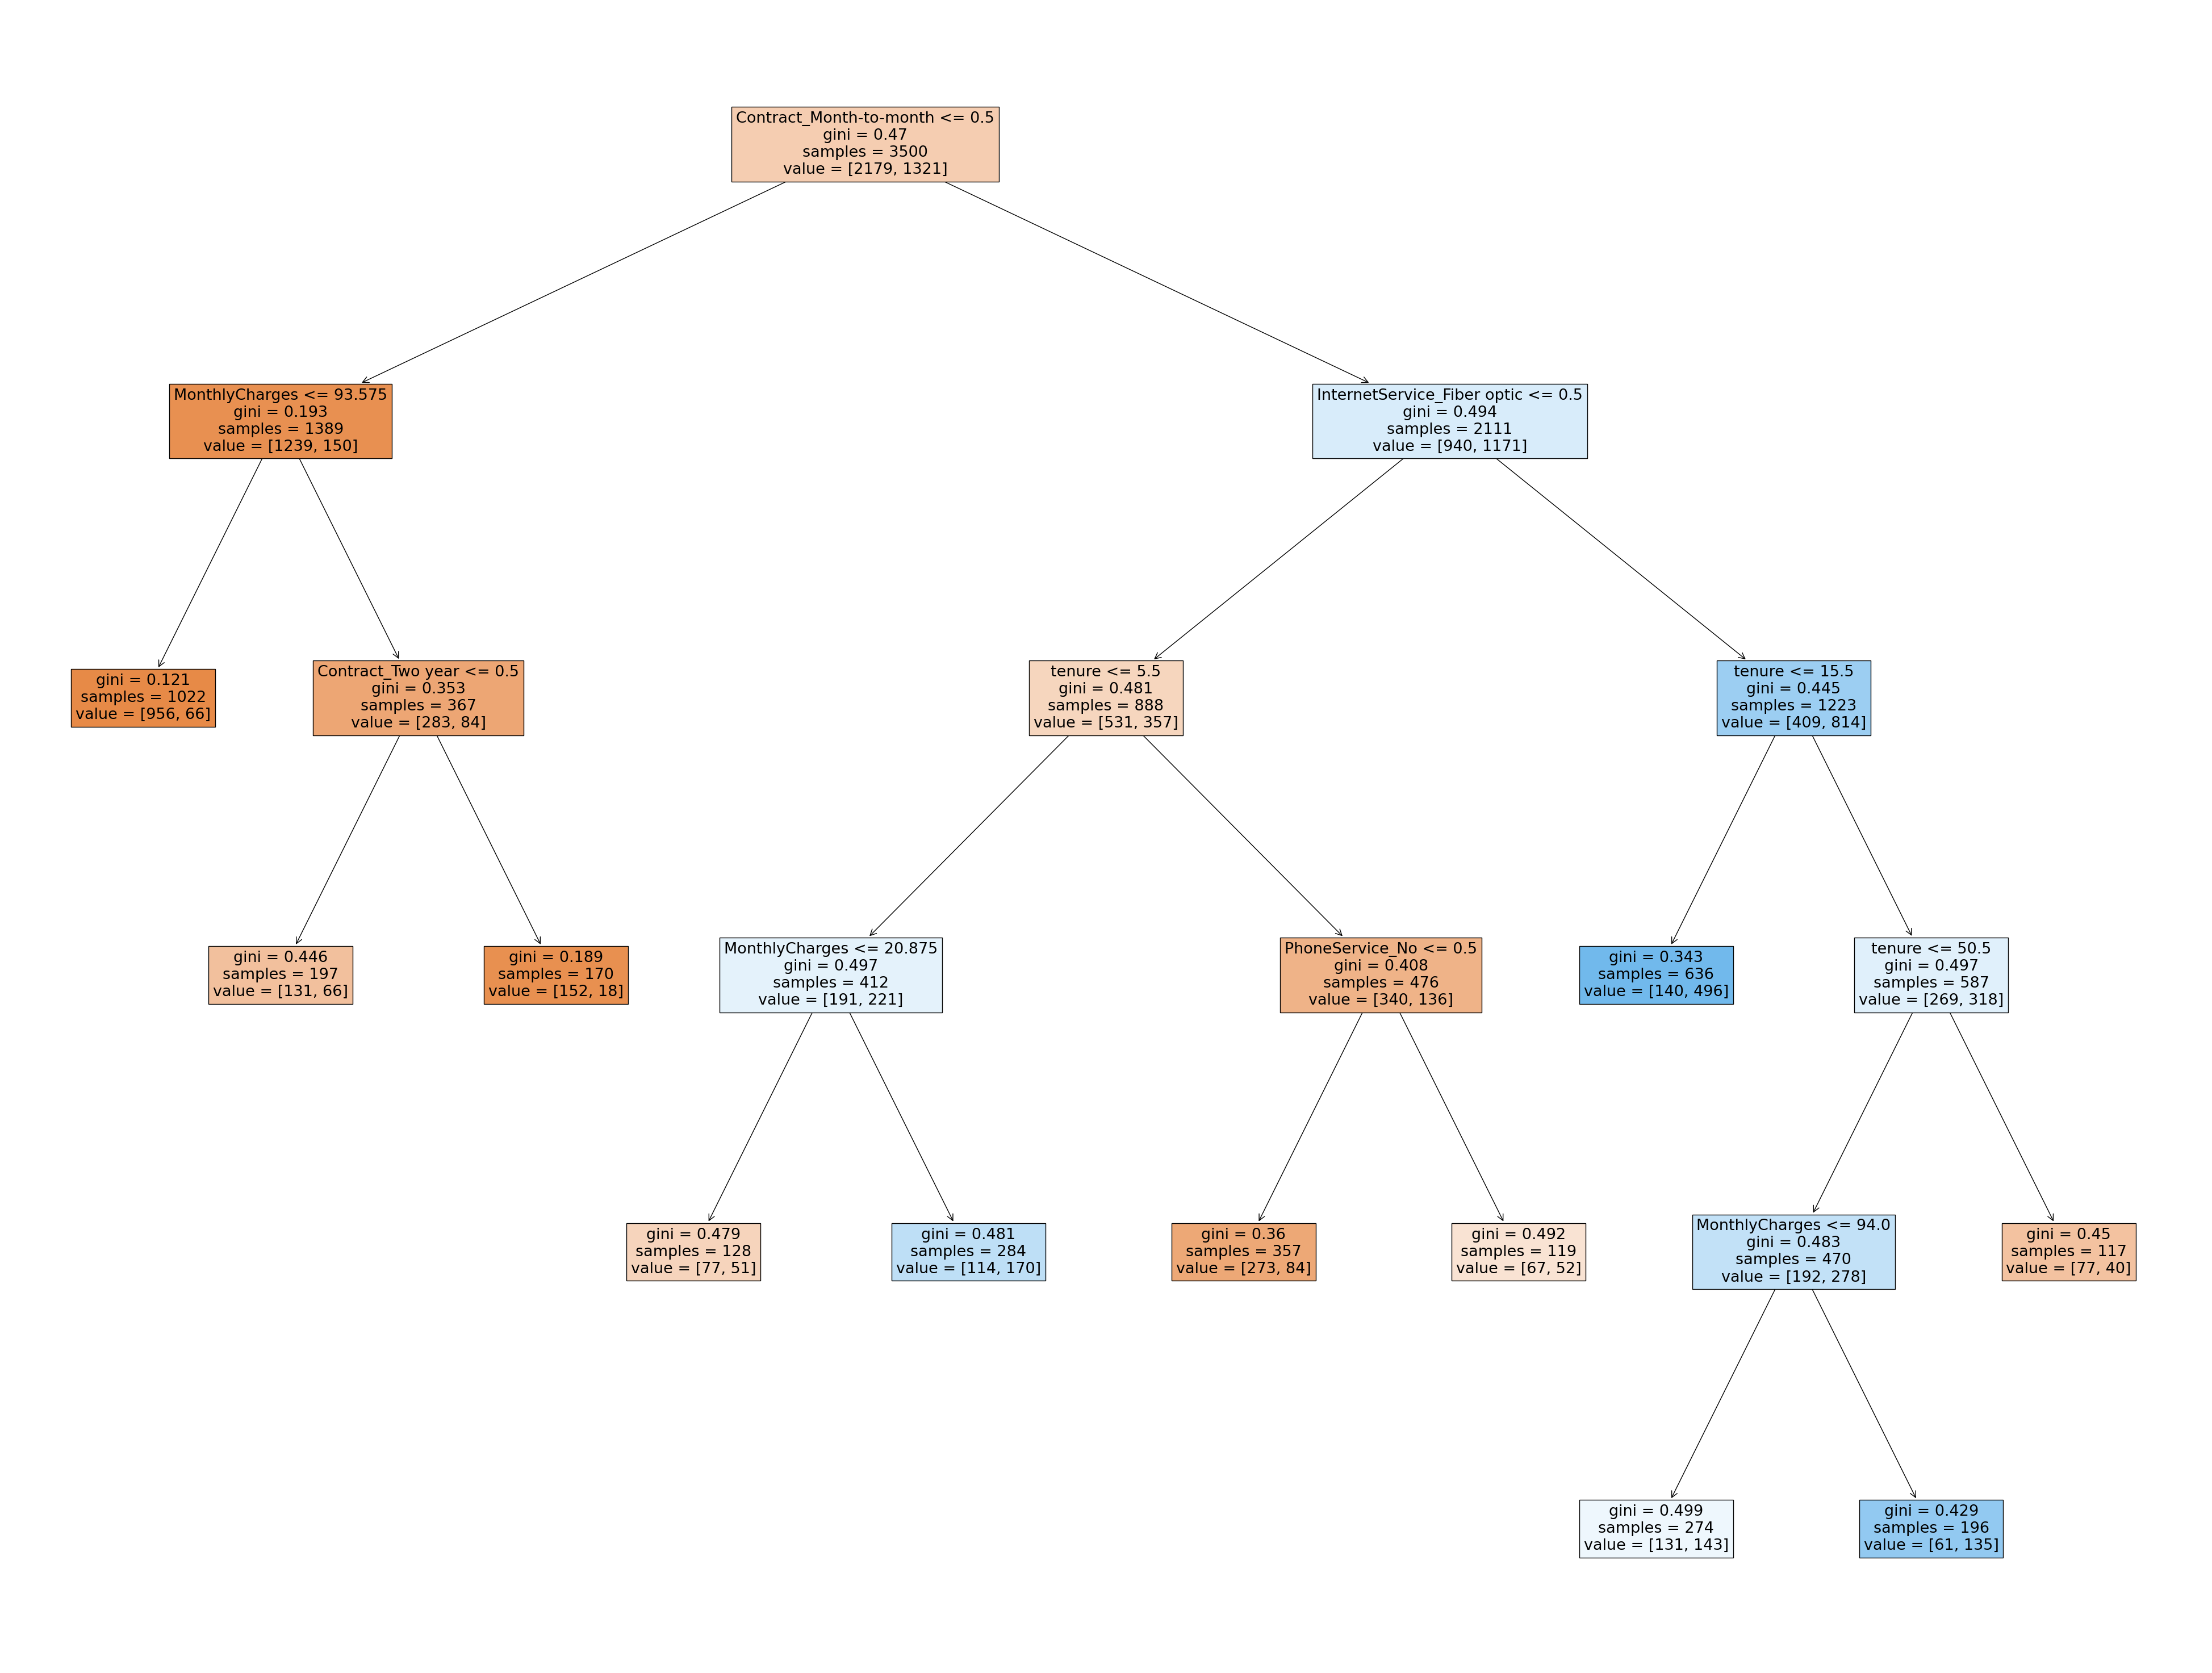

In [110]:
# Visualize the decision tree for 'tree_model_2'
# Note: This cell should run considerably faster than the one for 'tree_model_1'
# Note: If you face consistent issues with running this cell, please feel free to comment it out and skip it
plt.figure(figsize = (50, 38))
tree.plot_tree(tree_model_2, feature_names = X.columns, filled = True)
plt.savefig('tree_2_model.png')

In [23]:
# Print the number of leaves and the depth of the tree for 'tree_model_2' using the 'get_n_leaves()' and the 'get_depth()' methods
tree_model_2_n_leaves = tree_model_2.get_n_leaves()
tree_model_2_depth = tree_model_2.get_depth()
print('Number of leaves =', tree_model_2_n_leaves)
print('Tree depth =', tree_model_2_depth)

Number of leaves = 11
Tree depth = 5


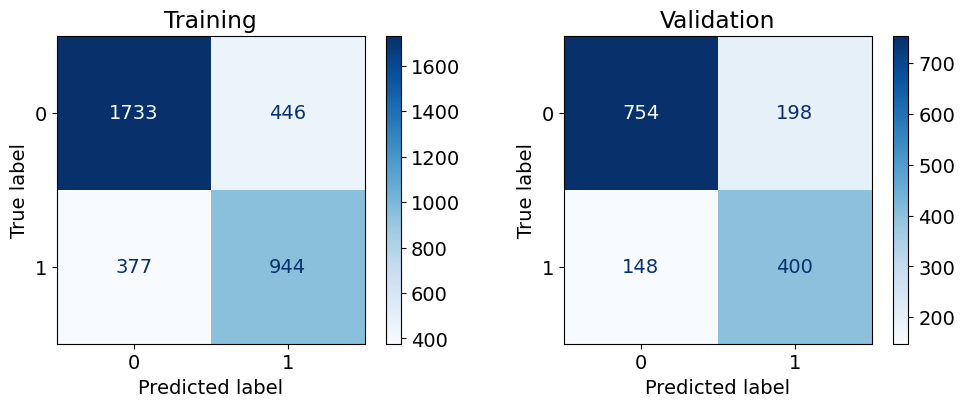

In [34]:
# Display the confusion matrices for 'tree_model_2' on the training and validation data
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ConfusionMatrixDisplay.from_estimator(tree_model_2, X_train, y_train, cmap = plt.cm.Blues, ax = ax[0])
ConfusionMatrixDisplay.from_estimator(tree_model_2, X_val, y_val, cmap = plt.cm.Blues, ax = ax[1])
ax[0].set_title('Training')
ax[1].set_title('Validation');

In [35]:
# Obtain predicted class labels for the training and validation data using 'tree_model_2' using the 'predict()' method
y_pred_2_train = tree_model_2.predict(X_train)
y_pred_2_val = tree_model_2.predict(X_val)

In [38]:
# Compute the accuracy and the sensitivity of 'tree_model_2' on the training and validation data
# Hint: Study the documentations of the different peformance metrics methods
# Note: The 'pos_label' parameter for the 'recall_score()' method should be set to the positive class label
# Note: The positive class label in this exercise is '1', which is also the default value for the 'pos_label' parameter
acc_train_2 = accuracy_score(y_pred_2_train, y_train)
acc_val_2 = accuracy_score(y_pred_2_val, y_val)
sens_train_2 = recall_score(y_pred_2_train, y_train, pos_label=1)
sens_val_2 = recall_score(y_pred_2_val, y_val, pos_label=1)

# Summarize the above metrics for the train and validation sets using a single data frame and display it
tree_model_2_metrics = pd.DataFrame(data = {'Accuracy': [acc_train_2, acc_val_2],
                                            'Sensitivity': [sens_train_2, sens_val_2]},
                                    index = ['tree_model_2_train', 'tree_model_2_val'])

tree_model_2_metrics

,Accuracy,Sensitivity
tree_model_2_train,0.764857,0.679137
tree_model_2_val,0.769333,0.668896


## Sub-task 3 - Decision Tree Model 3
For this sub-task, you will perform the following steps:
- Build a pruned decision tree using the *max_depth* hyperparameter
- Visualize the confusion matrix for the training and validation sets
- Compute various classification performance measures for the model

In [41]:
# Initialize a basic decision tree object using the 'DecisionTreeClassifier()' method
# Note: Use 'random_state = 0'
base_tree_model = DecisionTreeClassifier(random_state = 0)

# Define the range of the 'max_depth' parameter and store it in a parameter grid dictionary
parameters_grid = {'max_depth': np.arange(2, 26, 1)}

# Perform a grid search using the 'GridSearchCV()' method to obtain a grid on which to fit the training data
# Hint: Study the documentation of the 'GridSearchCV()' method
# Hint: The 'estimator' parameter should be set to the base tree model on which tuning is to be performed
# Hint: The 'param_grid' paramater should be set to the grid of parameters on which tuning is to be performed
# Note: Use 'scoring = accuracy' and 'cv = 5'
grid = GridSearchCV(base_tree_model, parameters_grid, cv = 5, scoring = 'accuracy', return_train_score = False, verbose = 1)

# Train a grid model using the training data
grid_model = grid.fit(X_train, y_train)

# Print the optimal value of 'max_depth' obtained from 'grid_model'
# Hint: Use the 'best_params_' attribute of the 'grid_model' object and look for 'max_depth'
best_max_depth = grid_model.best_params_['max_depth']
print('The optimal value of max_depth is', best_max_depth)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
The optimal value of max_depth is 4


In [42]:
# Train a decision tree on the training data using the 'DecisionTreeClassifier()' method with the best 'max_depth' value
# Hint: The parameter 'max_depth' needs to be set to 'best_max_depth'
# Note: Use 'random_state = 0'
tree_model_3 = DecisionTreeClassifier(random_state = 0, max_depth = best_max_depth)
tree_model_3 = tree_model_3.fit(X_train, y_train)

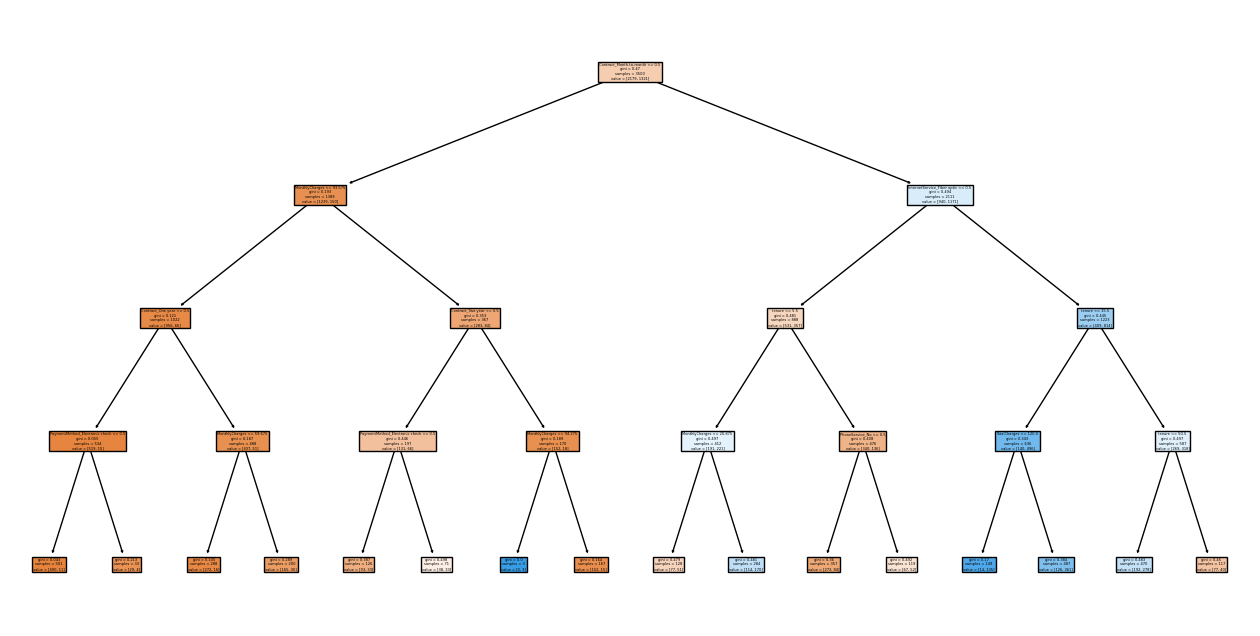

In [43]:
# Visualize the decision tree for 'tree_model_3'
# Note: This cell should run considerably faster than the one for 'tree_model_1'
# Note: If you face consistent issues with running this cell, please feel free to comment it out and skip it
fig = plt.figure(figsize = (16, 8))
fig = tree.plot_tree(tree_model_3, feature_names = X.columns, filled = True)

In [44]:
# Print the number of leaves and the depth of the tree for 'tree_model_3' using the 'get_n_leaves()' and the 'get_depth()' methods
tree_model_3_n_leaves = tree_model_3.get_n_leaves()
tree_model_3_depth = tree_model_3.get_depth()
print('Number of leaves =', tree_model_3_n_leaves)
print('Tree depth =', tree_model_3_depth)

Number of leaves = 16
Tree depth = 4


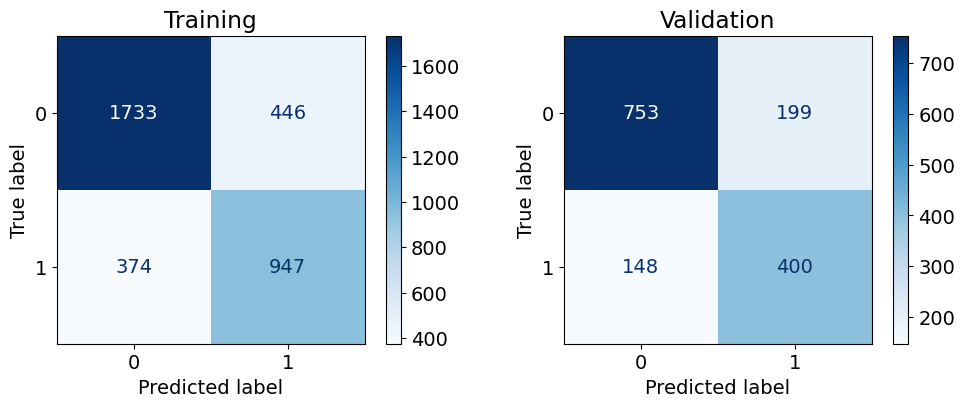

In [45]:
# Display the confusion matrices for 'tree_model_3' on the training and validation data
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ConfusionMatrixDisplay.from_estimator(tree_model_3, X_train, y_train, cmap = plt.cm.Blues, ax = ax[0])
ConfusionMatrixDisplay.from_estimator(tree_model_3, X_val, y_val, cmap = plt.cm.Blues, ax = ax[1])
ax[0].set_title('Training')
ax[1].set_title('Validation');

In [46]:
# Obtain predicted class labels for the training and validation data using 'tree_model_3' using the 'predict()' method
y_pred_3_train = tree_model_3.predict(X_train)
y_pred_3_val = tree_model_3.predict(X_val)

In [47]:
# Compute the accuracy and the sensitivity of 'tree_model_3' on the training and validation data
# Hint: Study the documentations of the different peformance metrics methods
# Note: The 'pos_label' parameter for the 'recall_score()' method should be set to the positive class label
# Note: The positive class label in this exercise is '1', which is also the default value for the 'pos_label' parameter
acc_train_3 = accuracy_score(y_pred_3_train, y_train)
acc_val_3 = accuracy_score(y_pred_3_val, y_val)
sens_train_3 = recall_score(y_pred_3_train, y_train, pos_label=1)
sens_val_3 = recall_score(y_pred_3_val, y_val, pos_label=1)

# Summarize the above metrics for the train and validation sets using a single data frame and display it
tree_model_3_metrics = pd.DataFrame(data = {'Accuracy': [acc_train_3, acc_val_3],
                                            'Sensitivity': [sens_train_3, sens_val_3]},
                                    index = ['tree_model_3_train', 'tree_model_3_val'])

tree_model_3_metrics

,Accuracy,Sensitivity
tree_model_3_train,0.765714,0.679828
tree_model_3_val,0.768667,0.667780


# Task 3 - Comparing the Models
For this task, you will perform the following steps:
- Compare various classification performance metrics for the three tree models that you have built
- Compare the ROC curves for these three models

In [48]:
# Calculate and print various classification performance measures for all three models on the training and validation data
# Hint: You will need to obtain the predicted class labels for each of the three models using the 'predict()' method
# Hint: You will need to obtain the predicted probabilities for each of the three models using the 'predict_proba()' method

# Hint: Study the documentations of the different peformance metrics methods
# Note: For sensitivity, precision, and F1 score, specify the 'pos_label' parameter as '1' or leave it at the default value
# Note: For specificity, specify the 'pos_label' parameter as '0'

# Compute predicted probabilities and class labels for each of the models on the training and validation data
# Hint: The second column of the matrix returned by the 'predict_proba()' method contains the positive class probabilities

models = [tree_model_1, tree_model_2, tree_model_3]
modelnames = ['tree_model_1', 'tree_model_2', 'tree_model_3']

train_probabilities = [None] * len(models)
val_probabilities = [None] * len(models)
train_y_pred = [None] * len(models)
val_y_pred = [None] * len(models)

i = -1
for model in models:
    i = i + 1
    train_probabilities[i] = models[i].predict_proba(X_train)[:, :1]
    val_probabilities[i] = models[i].predict_proba(X_val)[:, :1]
    train_y_pred[i] = models[i].predict(X_train)
    val_y_pred[i] = models[i].predict(X_val)

# Use the predicted class labels to compute the following performance metrics

# Compute the accuracies
train_acc = [None] * len(models)
val_acc = [None] * len(models)
for i in np.arange(0, len(models), 1):
    train_acc[i] = accuracy_score(y_train, train_y_pred[i], )
    val_acc[i] = accuracy_score(y_val, val_y_pred[i], )

# Compute the sensitivities
train_sens = [None] * len(models)
val_sens = [None] * len(models)
for i in np.arange(0, len(models), 1):
    train_sens[i] = recall_score(y_train, train_y_pred[i],  pos_label=1)
    val_sens[i] = recall_score(y_val, val_y_pred[i],  pos_label=1)

# Compute the specificities
train_spec = [None] * len(models)
val_spec = [None] * len(models)
for i in np.arange(0, len(models), 1):
    train_spec[i] = recall_score(y_train, train_y_pred[i],  pos_label=0)
    val_spec[i] = recall_score(y_val, val_y_pred[i],  pos_label=0)

# Compute the precisions
train_prec = [None] * len(models)
val_prec = [None] * len(models)
for i in np.arange(0, len(models), 1):
    train_prec[i] = precision_score(y_train, train_y_pred[i])
    val_prec[i] = precision_score(y_val, val_y_pred[i])

# Compute the F1 scores
train_f1 = [None] * len(models)
val_f1 = [None] * len(models)
for i in np.arange(0, len(models), 1):
    train_f1[i] = f1_score(y_train, train_y_pred[i])
    val_f1[i] = f1_score(y_val, val_y_pred[i])

# Use the predicted probabilities to compute the ROC AUC scores

# Compute the ROC AUC scores
train_auc = [None] * len(models)
val_auc = [None] * len(models)
for i in np.arange(0, len(models), 1):
    train_auc[i] = roc_auc_score(y_train, train_y_pred[i])
    val_auc[i] = roc_auc_score(y_train, train_y_pred[i])

# Summarize the above metrics for all three models using a single data frame and display it
modelcompare = pd.DataFrame(data = {'Training Accuracy': train_acc,
                                    'Validation Accuracy': val_acc,
                                    'Training Sensitivity': train_sens,
                                    'Validation Sensitivity': val_sens,
                                    'Training Specificity': train_spec,
                                    'Validation Specificity': val_spec,
                                    'Training Precision': train_prec,
                                    'Validation Precision': val_prec,
                                    'Training F1 Score': train_f1,
                                    'Validation F1 Score': val_f1,
                                    'Training ROC AUC Score': train_auc,
                                    'Validation ROC AUC Score': val_auc},
                            index = modelnames)

modelcompare

,Training Accuracy,Validation Accuracy,Training Sensitivity,Validation Sensitivity,Training Specificity,Validation Specificity,Training Precision,Validation Precision,Training F1 Score,Validation F1 Score,Training ROC AUC Score,Validation ROC AUC Score
tree_model_1,0.995429,0.673333,0.988645,0.587591,0.999541,0.722689,0.999235,0.549488,0.993912,0.567901,0.994093,0.994093
tree_model_2,0.764857,0.769333,0.714610,0.729927,0.795319,0.792017,0.679137,0.668896,0.696422,0.698080,0.754965,0.754965
tree_model_3,0.765714,0.768667,0.716881,0.729927,0.795319,0.790966,0.679828,0.667780,0.697863,0.697472,0.756100,0.756100


In [78]:
perf_df = pd.DataFrame({
    'a': np.abs(modelcompare['Training Accuracy'] - modelcompare['Validation Accuracy']) < 0.1,
    'b': modelcompare['Validation Accuracy'] > 0.75,
    'c': np.abs(modelcompare['Training ROC AUC Score'] - modelcompare['Validation ROC AUC Score'])  < 0.1,
    'd': modelcompare['Validation ROC AUC Score'] > 0.75,
    'e': modelcompare['Validation Sensitivity'] > 0.65,
    'f': modelcompare['Validation Precision'] > 0.65,
    'g': modelcompare['Validation F1 Score'] > 0.65,
})


In [ ]:
[np.abs(modelcompare['Training Accuracy'] - modelcompare['Validation Accuracy']) < 0.1,
modelcompare['Validation Accuracy'] > 0.75,
np.abs(modelcompare['Training ROC AUC Score'] - modelcompare['Validation ROC AUC Score'])  < 0.1,
modelcompare['Validation ROC AUC Score'] > 0.75,
modelcompare['Validation Sensitivity'] > 0.65,
modelcompare['Validation Precision'] > 0.65,
modelcompare['Validation F1 Score'] > 0.65,]

In [79]:
perf_df

,a,b,c,d,e,f,g
tree_model_1,False,False,True,True,False,False,False
tree_model_2,True,True,True,True,True,True,True
tree_model_3,True,True,True,True,True,True,True


C:\Users\Vr3n\AppData\Local\Temp\ipykernel_7240\3245131301.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = train_1_spec[i], y = train_sens[i], color = colorlist[i], label = '_nolegend_', ci = None)
C:\Users\Vr3n\AppData\Local\Temp\ipykernel_7240\3245131301.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = train_1_spec[i], y = train_sens[i], color = colorlist[i], label = '_nolegend_', ci = None)
C:\Users\Vr3n\AppData\Local\Temp\ipykernel_7240\3245131301.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = train_1_spec[i], y = train_sens[i], color = colorlist[i], label = '_nolegend_', ci = None)
C:\Users\Vr3n\AppData\Local\Temp\ipykernel_7240\3245131301.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = val_1_spec[i], 

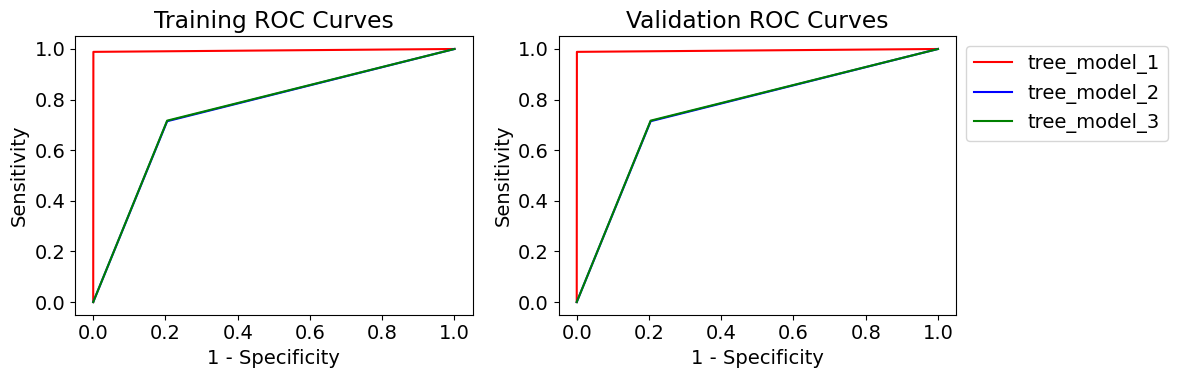

In [50]:
# Compare the ROC curves of the three models on the training and validation data

# Obtain the values for (1 - specificity) and sensitivity for the training and validation data using the 'roc_curve()' method for all three models
# Hint: Study the documentation of the 'roc_curve()' method
# Note: Specify the 'pos_label' as '1' or leave it at the default value
train_1_spec = [None] * len(models)
train_sens = [None] * len(models)
val_1_spec = [None] * len(models)
val_sens = [None] * len(models)
for i in np.arange(0, len(models), 1):
    train_1_spec[i], train_sens[i], _ = roc_curve(y_train, train_y_pred[i], pos_label=1)
    val_1_spec[i], val_sens[i], _ = roc_curve(y_train, train_y_pred[i], pos_label=1)

# Plot the ROC curves for all three models for the training and the validation data
plt.figure(figsize = (12, 4))
colorlist = ['red', 'blue', 'green']

plt.subplot(1, 2, 1)
for i in np.arange(0, len(models), 1):
    sns.lineplot(x = train_1_spec[i], y = train_sens[i], color = colorlist[i], label = '_nolegend_', ci = None)
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Training ROC Curves')

plt.subplot(1, 2, 2)
for i in np.arange(0, len(models), 1):
    sns.lineplot(x = val_1_spec[i], y = val_sens[i], color = colorlist[i], label = modelnames[i], ci = None)
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Validation ROC Curves')
plt.legend(bbox_to_anchor = [1, 1])

plt.tight_layout();

# Task 4 - Misclassification Costs of Suitable Model
For this task, you will perform the following steps:
- Select a model based on their classification performance measures
- Compute the baseline misclassification cost
- Observe how the misclassification cost varies as the cut-off for classification is increased
- Obtain the best misclassification cost and the associated cut-off from the training data
- Compute the potentially best misclassification cost of the model using the validation data

Note: Suppose that the problem statement requires that your classification model satisfies the following conditions:
- The absolute value of the difference between the training and the validation accuracies is less than 0.1
- The validation accuracy is greater than 0.75
- The absolute value of the difference between the training and the validation ROC AUC scores is less than 0.1
- The validation ROC AUC score is greater than 0.75
- The validation sensitivity is greater than 0.65
- The validation precision is greater than 0.65
- The validation F1 score is greater than 0.65

In [87]:
modelcompare.index[1]

'tree_model_2'

In [88]:
# Using the conditions on the performance measures as given above, select the best model
# Hint: Use the 'modelcompare' data frame that you created to obtain the name of the best model
best_model_name = modelcompare.index[1]

print('The most suitabel model according to the conditions of the problem statement is "{}".'.format(best_model_name))

The most suitabel model according to the conditions of the problem statement is "tree_model_2".


In [89]:
# Declare the cost of false positives and false negatives
# Note: The cost of false positives and false negatives are provided to you for this exercise
# Note: Labeling a 'not churn' customer as 'churn' leads to a few follow up phone calls only, so its cost is less
# Note: Labeling a 'churn' customer as 'not churn' may lead to the loss of that customer, so its cost is more
fp_cost = 50
fn_cost = 100
print('The cost of classifying a person as churn when they are not a churn = {} dollars'.format(fp_cost))
print('The cost of classifying a person as not churn when they are a churn = {} dollars'.format(fn_cost))

The cost of classifying a person as churn when they are not a churn = 50 dollars
The cost of classifying a person as not churn when they are a churn = 100 dollars


In [90]:
# Calculate the misclassification cost for the naive model on the training and the validation data
# Hint: The naive model in this case would classify everyone as a churn or class '1'
# Hint: That means all class '1' people are classified as class '1' accurately
# Hint: The class '0' people are the only ones that contribute to the misclassification
# Hint: So, you need to count how many 'y_train' and 'y_val' values are actually class '0', since all of them are labeled as class '1'
# Hint: Recall the formula for the misclassification cost
train_mc_cost_0 = y_train[y_train == 0].count() *  fn_cost
val_mc_cost_0 = y_val[y_val == 0].count() *  fn_cost

In [91]:
# Print the misclassification cost of classifying everyone as a churn
print('The misclassification cost of classifying everyone in the training data as a churn = {} dollars'.format(train_mc_cost_0))
print('The misclassification cost of classifying everyone in the validation data as a churn = {} dollars'.format(val_mc_cost_0))

The misclassification cost of classifying everyone in the training data as a churn = 217900 dollars
The misclassification cost of classifying everyone in the validation data as a churn = 95200 dollars


In [92]:
train_probabilities = tree_model_2.predict_proba(X_train)[:, 1]
val_probabilities = tree_model_2.predict_proba(X_val)[:, 1]

In [101]:
train_pred = tree_model_2.predict(X_train)
val_pred = tree_model_2.predict(X_val)

In [102]:
# Obtain the confusion matrices for the selected model using the 'confusion_matrix()' method for the training and the validation data
# Hint: Study the documentation of the 'confusion_matrix()' method
train_cf = confusion_matrix(y_train, train_pred)
val_cf = confusion_matrix(y_val, val_pred)

# Obtain the number of false positives and false negatives from the confusion matrices 'train_cf' and 'val_cf'
# Hint: Study the documentation of the 'confusion_matrix()' method
train_fp_count = train_cf[0, 1]
train_fn_count = train_cf[1, 0]
val_fp_count = val_cf[0, 1]
val_fn_count = val_cf[1, 0]

# Calculate and print the misclassification costs for the selected model for the training and the validation datasets
# Hint: Recall the formula for the misclassification cost
train_mc_cost = train_fp_count * fp_cost + train_fn_count * fn_cost
val_mc_cost = val_fp_count * fp_cost + val_fn_count * fn_cost
print('The misclassification cost on the training data of using the selected model with default cut-off = {} dollars'.format(train_mc_cost))
print('The misclassification cost on the validation data of using the selected model with default cut-off = {} dollars'.format(val_mc_cost))

The misclassification cost on the training data of using the selected model with default cut-off = 60000 dollars
The misclassification cost on the validation data of using the selected model with default cut-off = 24700 dollars


In [103]:
# Generate a list of misclassification costs for various cut-off values for the selected model on the training and the validation data
# Hint: If the 'train_probabilities' or the 'val_probabilities' value is greater than the cut-off, then the label is class '1', else it's class '0'
# Hint: Try using the 'np.where()' method to obtain the predictions for each cut-off value
train_mc_cost = []
val_mc_cost = []
cutoffs = np.arange(0, 1, 0.01)
for cutoff in cutoffs:
    train_y_pred_curr = np.where(train_probabilities > cutoff, 1, 0)
    train_curr_cf = confusion_matrix(y_train, train_y_pred_curr)
    train_fp_count = train_curr_cf[0, 1]
    train_fn_count = train_curr_cf[1, 0]
    train_mc_cost_current = train_fp_count * fp_cost + train_fn_count * fn_cost
    train_mc_cost.append(train_mc_cost_current)
    
    val_y_pred_curr = np.where(val_probabilities > cutoff, 1, 0)
    val_curr_cf = confusion_matrix(y_val, val_y_pred_curr)
    val_fp_count = val_curr_cf[0, 1]
    val_fn_count = val_curr_cf[1, 0]
    val_mc_cost_current = val_fp_count * fp_cost + val_fn_count * fn_cost
    val_mc_cost.append(val_mc_cost_current)

C:\Users\Vr3n\AppData\Local\Temp\ipykernel_7240\2665732260.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = cutoffs, y = train_mc_cost, color = 'blue', label = 'Training', ci = None)
C:\Users\Vr3n\AppData\Local\Temp\ipykernel_7240\2665732260.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = cutoffs, y = val_mc_cost, color = 'red', label = 'Validation', ci = None)


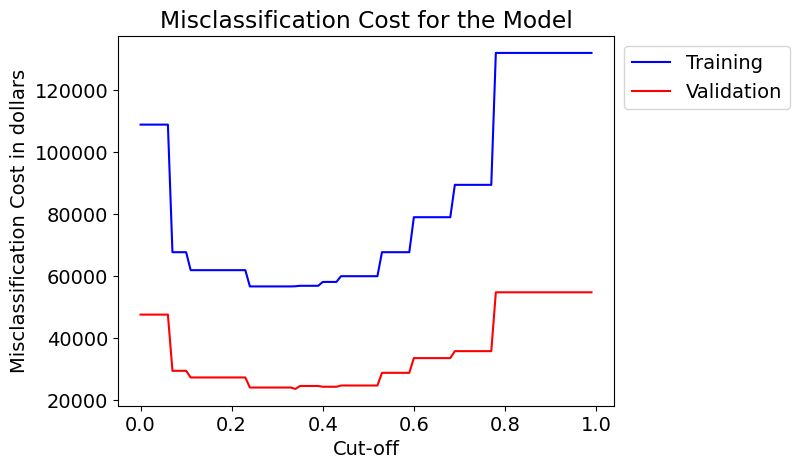

In [104]:
# Plot a graph to show how the misclassification costs vary as the cut-off is increased for the training and the validation data
sns.lineplot(x = cutoffs, y = train_mc_cost, color = 'blue', label = 'Training', ci = None)
sns.lineplot(x = cutoffs, y = val_mc_cost, color = 'red', label = 'Validation', ci = None)
plt.xlabel('Cut-off')
plt.ylabel('Misclassification Cost in dollars')
plt.title('Misclassification Cost for the Model')
plt.legend(bbox_to_anchor = [1, 1]);

In [106]:
# Obtain and print the best misclassification cost for the selected model on the training data
# Hint: The best misclassification cost would be the minimum cost
train_best_cost = min(train_mc_cost)
# Obtain and print the best cut-off cost for the selected model on the training data
# Hint: The best cut-off is the cut-off value for which the misclassification cost is the least
train_best_cutoff = cutoffs[train_mc_cost.index(train_best_cost)]

print('Best classification cut-off probability from the training data for the selected model = {}'.format(train_best_cutoff))
print('Best misclassification cost on the training data for the selected model = {} dollars'.format(train_best_cost))

Best classification cut-off probability from the training data for the selected model = 0.24
Best misclassification cost on the training data for the selected model = 56700 dollars


In [107]:
# Use the cut-off associated with the best misclassification cost on the training data to get the best cost for the validation data
# Hint: The expected best misclassification cost on the validation data is the cost associated with the best cut-off from the training data
val_best_cost = val_mc_cost[train_mc_cost.index(train_best_cost)]

print('Best misclassification cost on the validation data for the selected model = {} dollars'.format(val_best_cost))

Best misclassification cost on the validation data for the selected model = 24050 dollars
